# CLASIFICACIÓN

La **clasificación** es una técnica de Machine Learning supervisado que permite **asignar observaciones a categorías o clases** predefinidas.  
Su objetivo es identificar a qué categoría pertenece una nueva observación en función de sus características.  

Para determinar qué tipo de algoritmo de clasificación utilizar, debemos fijarnos en:

- La **naturaleza de los datos** (si son numéricos, categóricos, balanceados o desbalanceados).  
- El **número de clases** que queremos predecir.  
- El **tamaño del dataset** y la complejidad del problema.  

---

### TIPOS DE CLASIFICACIÓN

**1. Clasificación Binaria (Binary Classification)**  

    Divide las instancias en dos clases (ejemplo: 0 = normal, 1 = anormal).  
    Los algoritmos más populares son:
    - Regresión logística  
    - KNN  
    - Árboles de decisión  
    - SVM  
    - Naive Bayes  

**2. Clasificación Multiclase (Multi-class Classification)**  

    Divide las instancias en más de dos clases, pero cada observación solo puede pertenecer a una clase a la vez (no existe un punto intermedio).  
    Los algoritmos más usados son:
    - KNN  
    - Árboles de decisión  
    - Naive Bayes  
    - Random Forest  
    - Gradient Boosting  


**3. Clasificación Multietiqueta (Multi-label Classification)**  

    Cada instancia puede pertenecer a dos o más clases al mismo tiempo.  
    Ejemplo: una película puede clasificarse como acción y comedia.  
    Algoritmos más comunes:
    - Árboles de decisión multi-label  
    - Random Forest multi-label  
    - Gradient Boosting multi-label  


**4. Clasificación Desbalanceada (Imbalanced Classification)**  

    Se da cuando existe una distribución desigual entre clases (ejemplo: 95% clase normal vs 5% clase anómala).  
    Este escenario requiere técnicas especiales (reescalado, sobremuestreo, submuestreo) para evitar que el modelo se sesgue hacia la clase mayoritaria.  




## MÉTRICAS DE EVALUACIÓN

Al aplicar clasificadores a los datos, es importante definir **métricas de evaluación** que nos permitan medir el rendimiento del modelo.  
Estas métricas se calculan generalmente sobre un **conjunto de validación** y nos ayudan a entender si el modelo predice correctamente.  

Una de las formas más comunes de evaluar un clasificador es a través de la **matriz de confusión**, que muestra el desempeño en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.  

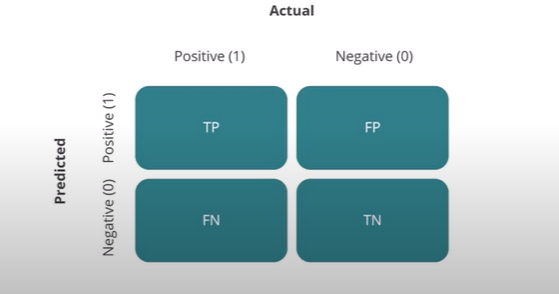

**1. Accuracy (Exactitud)**  
Proporción de predicciones correctas sobre el total de predicciones:  

    Accuracy = (TP + TN) / (TP + FP + TN + FN)

---

**2. Precisión (Precision)**  
Mide cuántas de las predicciones positivas realizadas por el modelo son realmente correctas:  

    Precision = TP / (TP + FP)

---

**3. Recall o Sensibilidad (Recall / Sensitivity)**  
Indica qué proporción de los casos positivos reales fueron detectados por el modelo:  

    Recall = TP / (TP + FN)

---

**4. Especificidad (Specificity)**  
Mide qué proporción de los casos negativos reales fueron correctamente identificados como negativos:  

    Specificity = TN / (TN + FP)


## PREPROCESAMIENTO: SMOTE

En problemas de clasificación a menudo nos encontramos con **clases desbalanceadas**.  
Ejemplo: detección de fraudes → 99% transacciones normales y solo 1% fraudulentas.  
Si entrenamos el modelo así, tenderá a predecir siempre la clase mayoritaria, ignorando la minoritaria.

---

#### ¿Qué es SMOTE?

**SMOTE (Synthetic Minority Over-sampling Technique)** es una técnica de oversampling (aumentar ejemplos de la clase minoritaria) que genera **nuevas instancias sintéticas de la clase minoritaria**, en lugar de simplemente duplicar datos.

---

#### Cómo funciona

1. Toma un punto de la clase minoritaria.  
2. Busca sus **vecinos más cercanos** en la misma clase.  
3. Genera un nuevo punto **interpolado** entre el punto original y uno de sus vecinos.  
4. Repite el proceso hasta balancear las clases.  

De esta forma, se aumenta la cantidad de ejemplos minoritarios y el dataset queda más equilibrado.

---

#### Ventajas y desventajas

- ✅ Ayuda a que el modelo aprenda mejor la clase minoritaria.  
- ✅ Funciona con cualquier modelo de clasificación (Logistic Regression, Random Forest, etc.).  
- ⚠️ Puede introducir ruido o causar **overfitting** si se genera demasiada información sintética.  

---

In [ ]:
from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# transforma_feature_df, transformado_labels_df = smote.fit_resample(feature_df, labels_df)

## LOGISTIC REGRESSION

La **Regresión Logística** es un algoritmo de **clasificación**, no de regresión.  
Se utiliza cuando la variable dependiente es **categórica** (por ejemplo: Sí/No, 0/1, etc.) y queremos predecir su clase a partir de varias variables independientes.

---

### Características principales

- Se usa en **problemas de clasificación**.  
- Predice la **probabilidad** de que un punto de datos pertenezca a una clase.  
- Garantiza que el resultado esté siempre entre **0 y 1**.  
- Utiliza la **función sigmoide** para mapear cualquier valor real a un rango entre 0 y 1.  

---

#### Cómo funciona

1. Calcula una combinación lineal de las variables independientes.  
2. Aplica la **función logística (sigmoide)**:  
   - Si la probabilidad es **> 0.5** → Clase positiva (1).  
   - Si la probabilidad es **≤ 0.5** → Clase negativa (0).  

---

#### Tipos de Logistic Regression

- **Binaria** → Dos clases posibles (ej: 0 o 1).  
- **Multinomial** → Más de dos clases posibles (ej: 0, 1 o 2).  

---





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

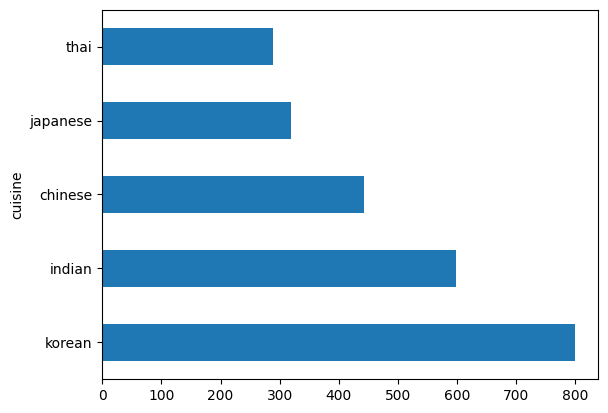

In [ ]:
df['cuisine'].value_counts().plot.barh()

En este paso estamos **separando el DataFrame original (`df`) en varios DataFrames**, uno por cada tipo de cocina, para poder analizarlos de manera independiente.

---

- `df['cuisine'] == 'thai'` → crea una **condición booleana** (True/False) que indica si cada fila pertenece a la cocina "thai".  
- `df[condición]` → filtra el DataFrame, **seleccionando solo las filas donde la condición es True**.   


In [ ]:
thai_df = df[df['cuisine'] == 'thai']
japanese_df = df[df['cuisine'] == 'japanese']
indian_df = df[df['cuisine'] == 'indian']
chinese_df = df[df['cuisine'] == 'chinese']
korean_df = df[df['cuisine'] == 'korean']

In [ ]:
print(f'Thai: {thai_df.shape}')
print(f'Japanese: {japanese_df.shape}')
print(f'Indian: {indian_df.shape}')
print(f'Chinese: {chinese_df.shape}')
print(f'Korean: {korean_df.shape}')

Thai: (289, 385)
Japanese: (320, 385)
Indian: (598, 385)
Chinese: (442, 385)
Korean: (799, 385)


Ahora vamos a crear un DataFrame que cuente **cuántas recetas usan cada ingrediente**.

- `sum(axis=0)` = suma verticalmente cada columna para obtener el total de recetas en las que aparece cada ingrediente.

- `to_frame()` = se usa para convertir **una serie** a un **DataFrame**, lo que facilita ordenarlo y graficarlo.


In [ ]:
def create_ingredientes_df(df):
    # Eliminamos columnas irrelevantes
    ingredientes_df = df.drop(['cuisine', 'Unnamed: 0'], axis=1, errors='ignore')

    # Sumamos por columna → cuántas recetas usan cada ingrediente
    ingredientes_df = ingredientes_df.sum(axis=0).to_frame('cantidad')

    # Filtramos ingredientes que aparecen al menos una vez
    ingredientes_df = ingredientes_df[ingredientes_df['cantidad'] > 0]

    # Ordenamos de mayor a menor
    ingredientes_df = ingredientes_df.sort_values(by='cantidad', ascending=False)

    return ingredientes_df


<Axes: >

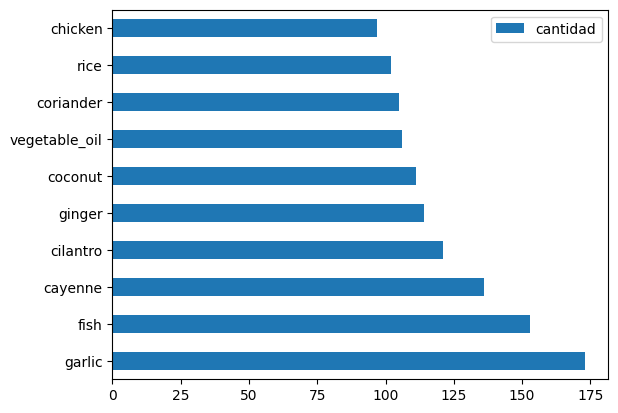

In [ ]:
thai_df_ingredientes = create_ingredientes_df(thai_df)
thai_df_ingredientes.head(10).plot.barh()


<Axes: >

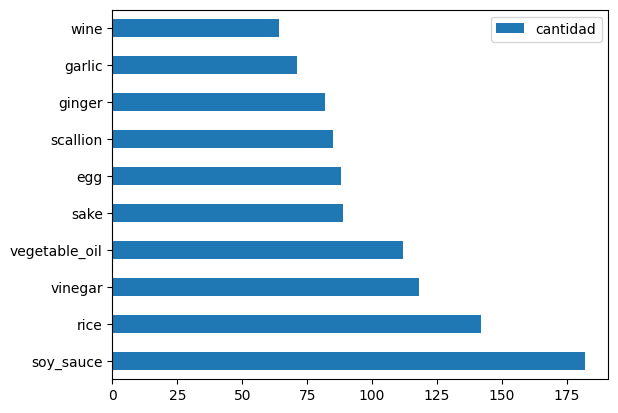

In [ ]:
japanese_df_ingredientes = create_ingredientes_df(japanese_df)
japanese_df_ingredientes.head(10).plot.barh()


<Axes: >

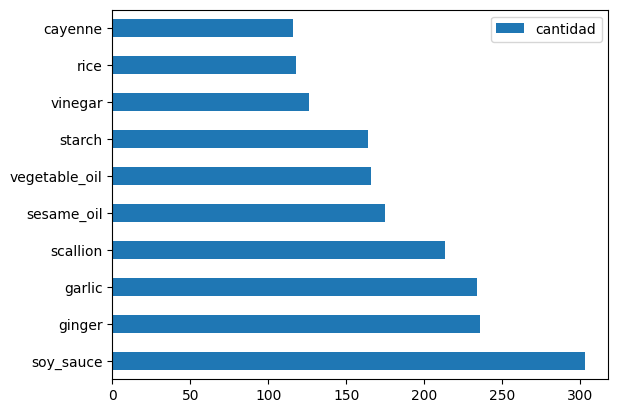

In [ ]:
chinese_df_ingredientes = create_ingredientes_df(chinese_df)
chinese_df_ingredientes.head(10).plot.barh()

<Axes: >

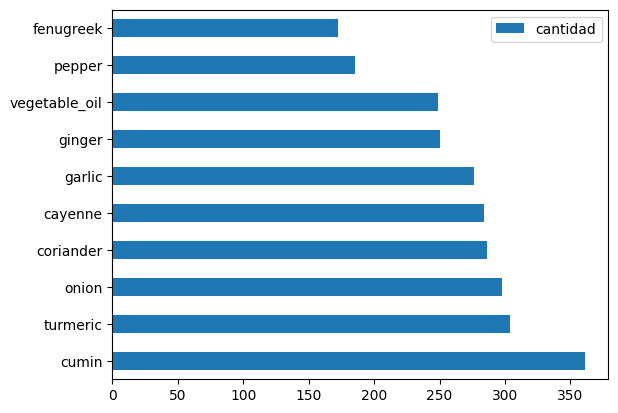

In [ ]:
indian_df_ingredientes = create_ingredientes_df(indian_df)
indian_df_ingredientes.head(10).plot.barh()

<Axes: >

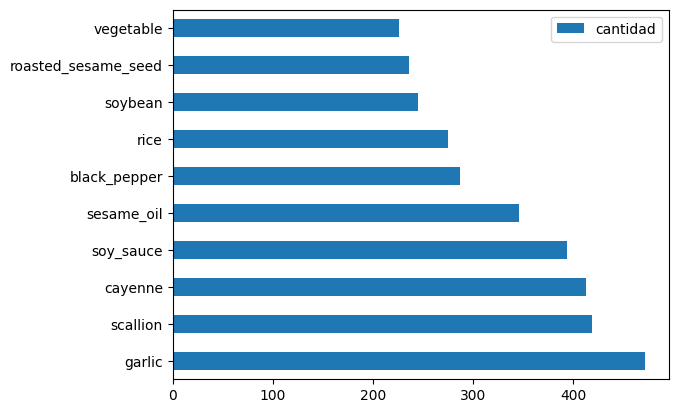

In [ ]:
korean_df_ingredientes = create_ingredientes_df(korean_df)
korean_df_ingredientes.head(10).plot.barh()

In [ ]:
feature_df = df.drop(['cuisine', 'Unnamed: 0'], axis=1)
labels_df = df['cuisine']

feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Los datos estan desbalanzeados asi que usaremos SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
transforma_feature_df, transformado_labels_df = smote.fit_resample(feature_df, labels_df)

In [ ]:
print(f'Nuevos label:\n {transformado_labels_df.value_counts()}')
print(f'Viejos label:\n {labels_df.value_counts()}')

Nuevos label:
 cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
Viejos label:
 cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


Podemos ver que ahora estan compensados

### MODELO

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(transforma_feature_df, transformado_labels_df, test_size=0.3, random_state=42)

In [ ]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8090075062552127


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print(f' Ingredientes: {X_test.iloc[50][X_test.iloc[50] != 0].keys()}')
print(f'cusiine: {y_test.iloc[50]}')

 Ingredientes: Index(['coconut', 'coriander', 'cumin', 'fenugreek', 'lemongrass', 'pepper',
       'rice', 'turmeric'],
      dtype='object')
cusiine: thai


In [ ]:
# Seleccionamos la fila 50 del conjunto de prueba y la convertimos en un array compatible con el modelo
sample = X_test.iloc[50].values.reshape(1, -1)  # 1 fila, n columnas

# Predicción de la clase más probable para esta receta
predicted_class = model.predict(sample)

# Todas las clases posibles que aprendió el modelo
all_classes = model.classes_

# Probabilidades de pertenencia a cada clase
probabilities = model.predict_proba(sample)

# Convertimos las probabilidades a un DataFrame con columnas como las clases
proba_df = pd.DataFrame(data=probabilities, columns=all_classes)

# Transponemos para que las clases estén como índice y ordenamos por probabilidad descendente
top_predictions = proba_df.T.sort_values(by=0, ascending=False).head(10)

# Mostramos resultados
print(f'Predicted class: {predicted_class}')
print(f'All classes: {all_classes}')
print("Top predicted classes with probabilities:")
top_predictions.head()


Predicted class: ['thai']
All classes: ['chinese' 'indian' 'japanese' 'korean' 'thai']
Top predicted classes with probabilities:


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
thai,0.964138
indian,0.018601
japanese,0.016171
chinese,0.001058
korean,0.000032


In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.76      0.72      0.74       236
      indian       0.92      0.89      0.90       245
    japanese       0.74      0.80      0.77       231
      korean       0.82      0.75      0.78       242
        thai       0.81      0.88      0.85       245

    accuracy                           0.81      1199
   macro avg       0.81      0.81      0.81      1199
weighted avg       0.81      0.81      0.81      1199



## NAIVE BAYES

**Naive Bayes** es un algoritmo de clasificación basado en el **Teorema de Bayes**, que utiliza la probabilidad para predecir la clase a la que pertenece una observación.  


---

### TEORÍA: EL TEOREMA DE BAYES

El teorema calcula la probabilidad de que ocurra un evento **A**, dado que ya ha ocurrido un evento **B**:  

    P(A|B) = [ P(B|A) * P(A) ] / P(B)

Donde:  
- **P(A)** → Probabilidad de la hipótesis (antes de ver los datos).  
- **P(B)** → Probabilidad de la evidencia (que aparezcan esos datos).  
- **P(A|B)** → Probabilidad de la hipótesis **dada la evidencia** (lo que realmente queremos calcular).  
- **P(B|A)** → Probabilidad de ver la evidencia **si la hipótesis fuera cierta**.  


---

#### TIPOS DE NAIVE BAYES

1. **Gaussian Naive Bayes**  
   - Se usa cuando las características son numéricas y se asume que siguen una **distribución normal** (curva de campana).  

2. **Multinomial Naive Bayes**  
   - Funciona bien con **frecuencias de conteo**, por ejemplo en clasificación de textos (número de veces que aparece una palabra).  

3. **Bernoulli Naive Bayes**  
   - Se utiliza cuando las variables son **binarias** (0 o 1, sí o no).  
   - Ejemplo: si una palabra aparece o no en un documento.  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Conceptos clave:**

- `n_samples` → Número de observaciones (filas) que tendrá el dataset.  
- `n_features` → Número de características por observación (columnas).  
- `centers` → Número de grupos o clases distintas que queremos generar.  
- `cluster_std` → Desviación estándar de los clusters, controla qué tan dispersos están los puntos dentro de cada clase.  
- `random_state` → Semilla aleatoria para reproducir los mismos datos en cada ejecución.
---
**Salida de la función:**
- `X` → Matriz de características (`n_samples × n_features`).  
- `y` → Vector de etiquetas indicando a qué clase pertenece cada observación.  


In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=1.5)

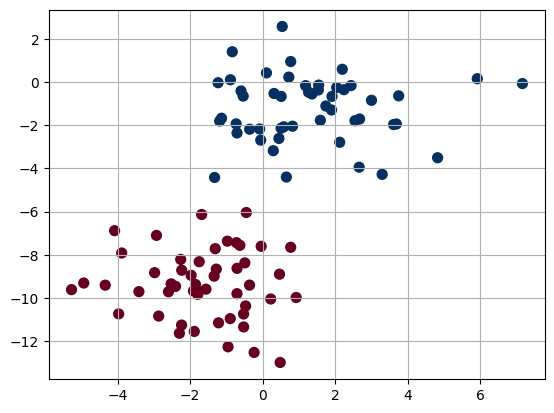

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.grid()
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model = GaussianNB()
model.fit(X, y)

GaussianNB()

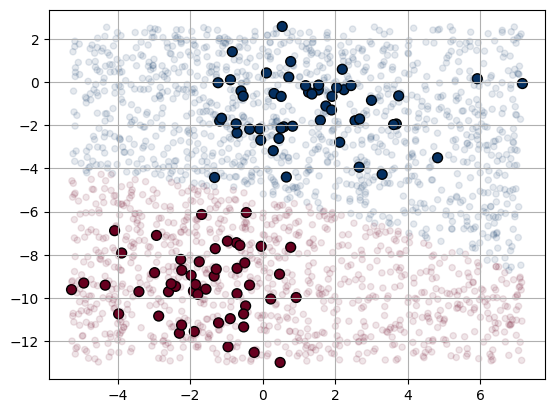

In [ ]:
rng = np.random.RandomState(2)

# 2000 puntos en 2D, cada columna con su rango
X_new = rng.uniform(low=[X[:,0].min(), X[:,1].min()],
                    high=[X[:,0].max(), X[:,1].max()],
                    size=(2000, 2))

# Predecimos su clase
y_new = model.predict(X_new)

# Graficamos
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu', edgecolor='k')
lim = plt.axis()
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=20, alpha=0.1, cmap='RdBu')
plt.axis(lim)
plt.grid()
plt.show()


In [ ]:
yprob  = model.predict_proba(X_new)
yprob[-8:].round(2)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

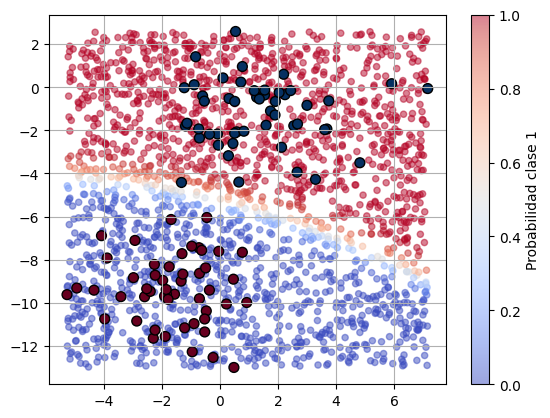

In [ ]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=yprob[:, 1], s=20, cmap='coolwarm', alpha=0.5)
plt.colorbar(label="Probabilidad clase 1")
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu', edgecolor='k')
plt.grid()
plt.show()


## STOCHASTIC GRADIENT DESCENT (SGD)

**Stochastic Gradient Descent** es un algoritmo que busca encontrar el **mínimo de una función** ajustando iterativamente los parámetros.  

En otras palabras, empieza desde un **punto aleatorio** y "camina hacia abajo" siguiendo la pendiente de la función hasta llegar al **punto mínimo**.

---

#### **Pasos del algoritmo**

1. **Calcular el gradiente** de la función con respecto a los parámetros.  

2. **Elegir un valor inicial aleatorio** para los parámetros.  

3. **Actualizar la función** usando los valores actuales de los parámetros.  

4. **Calcular el tamaño del paso** (step size) para cada parámetro:

    Step Size = gradiente * learning rate


5. **Actualizar los parámetros**:


    Nuevo parametro = viejo parametro - step size

6. **Repetir los pasos del 3-5 hasta que el gradiente es casi 0.**

---

**LEARNING RATE**

Influencia el algoritmo a converger al minimo.
Mayor learning rate, los pasos van a ser mas largos, asi que solemos coger pasos mas pequeños.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
df = datasets.load_breast_cancer()

X = df.data
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 🧠 Perceptrón

#### **¿Qué es el perceptrón?**
El **perceptrón** es el modelo más simple de red neuronal artificial.

Se utiliza para **clasificación binaria**, es decir, decidir entre dos clases posibles (ejemplo: positivo/negativo, sí/no, 0/1).

**Idea principal:**
- Recibe entradas: x1, x2, ..., xn
- Cada entrada tiene un peso asociado: w1, w2, ..., wn
- Se calcula una combinación lineal:

      z = (w1 * x1) + (w2 * x2) + ... + (wn * xn) + bias (coef_[0])

    donde `b` es el sesgo (bias).

- Se aplica una función de activación (umbral):

    y = 1 si z >= 0  
    y = 0 si z < 0

---

#### **Regla de aprendizaje del perceptrón**
El perceptrón **aprende ajustando sus pesos** cada vez que se equivoca.  

**Actualización de pesos:**

    w := w + η * (y_real - y_pred) * x  
    b := b + η * (y_real - y_pred)

Donde:
- `η` = tasa de aprendizaje (learning rate)  
- `y_real` = etiqueta correcta  
- `y_pred` = predicción del modelo  
- `x` = vector de características del dato actual  

---  

El perceptrón funciona de esta forma:
1. Toma un ejemplo de entrenamiento.  
2. Predice su etiqueta.  
3. Si se equivoca, ajusta los pesos inmediatamente.  




In [ ]:
import numpy as np

class CustomPerceptron(object):

    # 1. Constructor (__init__)

    def __init__(self, n_interations=100, random_state=1, learning_rate=0.01):

        self.n_interations = n_interations
        self.random_state = random_state
        self.learning_rate = learning_rate


    # 2. Entrenamiento (fit)

    def fit(self, X, y):
        # Inicializamos los pesos (coeficientes) con valores pequeños y aleatorios
        # Nota: X.shape[1] es el número de características
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # Disribucion normal (Campana de Gauss) centrada en 0 y desviacion estandar de 0.01
        # self.coef_[0] es el bias, el resto son los pesos

        # Entrenamiento durante n_iteraciones
        for _ in range(self.n_interations):  # Pongo_ cuando no me importa la variable solo cuando quiero las repeticiones
            # Recorremos cada muestra (xi) y su etiqueta esperada (expected_value), X es la matriz (cada fila tiene una etiqueta asociada) e y es el vector de etiquetas
            for xi, expected_value in zip(X, y):
                # Obtenemos la predicción actual del modelo
                predicted_value = self.predict(xi)

                # Calculamos el error: (valor real - valor predicho)  y actualizamos los pesos (regla del perceptrón)
                self.coef_[1:] += self.learning_rate * (expected_value - predicted_value) * xi  # Corrige cada peso proporcional al error y al valor de la característica correspondiente

                # Actualizamos el bias
                self.coef_[0] += self.learning_rate * (expected_value - predicted_value)


    # 3. Activación lineal : En un perceptrón, la activación decide qué salida produce el modelo para un dato.

    def activation(self, X):
        # Calculamos la suma ponderada: w·x + b
        return np.dot(X, self.coef_[1:]) + self.coef_[0]


    # 4. Predicción

    def predict(self, X):
        # Si la activación >= 0 -> clase 1
        # Si la activación < 0 -> clase 0
        return np.where(self.activation(X) >= 0.0, 1, 0)


    # 5. Evaluación del modelo (score)

    def score(self, X, y):
        # Contador de errores
        misclassified_data_count = 0

        # Comprobamos cada muestra
        for xi, expected_value in zip(X, y):
            predicted_value = self.predict(xi)
            if predicted_value != expected_value:
                misclassified_data_count += 1

        # Total de datos
        total_data_count = len(X)

        # Calculamos la precisión = 1 - (errores / total)
        self.score_ = 1 - (misclassified_data_count / total_data_count)
        return self.score_


In [ ]:
n_iterations =300
random_state = 1
learning_rate = 0.01

perceptron = CustomPerceptron(n_iterations, random_state, learning_rate)
perceptron.fit(X_train, y_train)



In [ ]:
print(f'Exactitud el modelo en datos nuevos: {perceptron.score(X_test, y_test)}')
print(f'Exactitud el modelo en datos de entrenamiento: {perceptron.score(X_train, y_train)}')

Exactitud el modelo en datos nuevos: 0.8070175438596492
Exactitud el modelo en datos de entrenamiento: 0.8703296703296703


## K-Nearest Neighbors (KNN)

El algoritmo K-Nearest Neighbors asume que los datos nuevos son similares a los casos disponibles y asigna cada nuevo dato a una categoría parecida a sus vecinos más cercanos.

- Se puede usar tanto en **clasificación** como en **regresión**.  
- Es un algoritmo **no paramétrico**, lo que significa que **no hace supuestos específicos sobre la distribución de los datos**.

---

### **Pasos del algoritmo**

1. **Cargar los datos y definir el conjunto de entrenamiento**  
   - Se entrenará el modelo con los datos disponibles (training set).

2. **Elegir el valor de K**  
   - K es el número de vecinos más cercanos que se considerarán para determinar la categoría de un nuevo dato.

3. **Para cada punto del conjunto de prueba (test set):**  

    - Calcular la distancia entre el punto de prueba y cada punto del conjunto de entrenamiento.  
      Algunas métricas comunes son:  
      - **`Euclidean`**  
        ```
        dist = sqrt((x1 - x2)^2 + (y1 - y2)^2 + ...)
        ```
        Es la distancia “normal” en geometría y se usa con características numéricas en la misma escala.  

      - **`Manhattan`**  
        ```
        dist = |x1 - x2| + |y1 - y2| + ...
        ```
        Suma de las diferencias absolutas. Imagina un taxi moviéndose solo en líneas rectas.  

      - **`Hamming`**
        ```
        dist = número de posiciones distintas
        ```
        Se usa para datos categóricos o binarios, contando cuántas posiciones difieren.  

    - Ordenar las distancias de menor a mayor.  

    - Seleccionar los **K vecinos más cercanos**.  

    - Asignar al punto de prueba la **categoría más frecuente** entre esos K vecinos.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


Como gender es un objeto vamos a crear una variable dummie

In [ ]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, gender], axis=1)
df.drop('Gender', axis=1, inplace=True)
df.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [ ]:
X = df[['Age', 'EstimatedSalary', 'Male']]  # 2D
y = df['Purchased']  # 1D

Escalamos para que todas las variables tengan la misma desviazion estandard

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [ ]:
df_feat = pd.DataFrame(X, columns=['Age', 'EstimatedSalary', 'Male'])
df_feat.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(f'La matriz de confusion :\n{confusion_matrix(y_test, pred)}')
print(f'\nLas metricas :\n {classification_report(y_test, pred)}')



La matriz de confusion :
[[39  2]
 [ 5 14]]

Las metricas :
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        41
           1       0.88      0.74      0.80        19

    accuracy                           0.88        60
   macro avg       0.88      0.84      0.86        60
weighted avg       0.88      0.88      0.88        60



## 🌲Árboles de Decisión

Un **árbol de decisión** es un modelo de aprendizaje automático **no paramétrico** que puede usarse tanto para **clasificación** como para **regresión**.  
Su funcionamiento se basa en dividir los datos en subconjuntos cada vez más pequeños a partir de preguntas o condiciones sobre las variables.

---

### **Estructura de un árbol de decisión**

- **Nodo raíz (root node):**  
  Representa el punto de inicio del árbol, donde se hace la primera división en función de un atributo.

- **Ramas (branches):**  
  Conectan nodos y representan las posibles respuestas a una pregunta.

- **Nodos internos (decision nodes):**  
  Son los puntos intermedios donde se formulan nuevas preguntas basadas en atributos.

- **Hojas (leaves):**  
  Representan el resultado final (clase en clasificación o valor en regresión).  

---

### **Pureza de un nodo**

La **pureza de un nodo** indica qué tan homogéneo es con respecto a la variable objetivo:  
- Un nodo es **puro** si todos sus datos pertenecen a la misma clase.  
- Se utilizan medidas como:  
  - **Gini** (índice de impureza de Gini)  
  - **Entropía** (del aprendizaje de la teoría de la información)  
  - **Error de clasificación**

---

### **Cómo funciona el entrenamiento**

1. Seleccionar el mejor atributo para dividir los datos (basado en la métrica elegida: Gini, entropía, etc.).  
2. Crear un nodo con esa pregunta.  
3. Dividir los datos en ramas según las respuestas.  
4. Repetir el proceso en cada rama hasta que:  
   - Se alcance un número mínimo de muestras.  
   - El nodo sea puro.  
   - Se cumpla la profundidad máxima establecida.  

---

### **Ventajas**
- Fácil de entender y visualizar.  
- No requiere escalado de variables.  
- Puede manejar datos numéricos y categóricos.  

### **Desventajas**
- Tiende a sobreajustar (overfitting) si no se controla la profundidad.  
- Sensible a pequeños cambios en los datos.  
- Menos preciso que modelos más complejos (Random Forest, Gradient Boosting).  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsç

In [ ]:
df = pd.read_csv('balance-scale.csv')
df.head()

,left-weight,left-distance,right-weight,right-distance,class
0,double,double,double,double,String
1,1.0,1.0,1.0,1.0,B
2,1.0,1.0,1.0,2.0,R
3,1.0,1.0,1.0,3.0,R
4,1.0,1.0,1.0,4.0,R


In [ ]:
df.drop(0, axis=0)

,left-weight,left-distance,right-weight,right-distance,class
1,1.0,1.0,1.0,1.0,B
2,1.0,1.0,1.0,2.0,R
3,1.0,1.0,1.0,3.0,R
4,1.0,1.0,1.0,4.0,R
5,1.0,1.0,1.0,5.0,R
...,...,...,...,...,...
621,5.0,5.0,5.0,1.0,L
622,5.0,5.0,5.0,2.0,L
623,5.0,5.0,5.0,3.0,L
624,5.0,5.0,5.0,4.0,L


In [ ]:
df = df.drop(0, axis=0)

In [ ]:

df[['left-weight', 'left-distance', 'right-weight', 'right-distance']] = df[['left-weight', 'left-distance', 'right-weight', 'right-distance']].astype(float).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 1 to 625
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   left-weight     625 non-null    int64 
 1   left-distance   625 non-null    int64 
 2   right-weight    625 non-null    int64 
 3   right-distance  625 non-null    int64 
 4   class           625 non-null    object
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
X = df.drop('class', axis=1)
y = df[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
arbol = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth= 4, min_samples_leaf= 5)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred = arbol.predict(X_test)

In [ ]:
print(f'La matriz de confusion :\n{confusion_matrix(y_test, y_pred)}')
print(f'\nLas metricas :\n {classification_report(y_test, y_pred)}')

La matriz de confusion :
[[ 0 11  7]
 [ 0 71  9]
 [ 0 14 76]]

Las metricas :
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.74      0.89      0.81        80
           R       0.83      0.84      0.84        90

    accuracy                           0.78       188
   macro avg       0.52      0.58      0.55       188
weighted avg       0.71      0.78      0.74       188



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
target = list(df['class'].unique())
feature_names = list(df.drop('class', axis=1).columns)

In [ ]:
from sklearn.tree import export_text
r = export_text(arbol, feature_names=feature_names)

In [ ]:
print(r)

|--- left-weight <= 2.50
|   |--- right-distance <= 1.50
|   |   |--- left-distance <= 2.50
|   |   |   |--- right-weight <= 2.50
|   |   |   |   |--- class: L
|   |   |   |--- right-weight >  2.50
|   |   |   |   |--- class: R
|   |   |--- left-distance >  2.50
|   |   |   |--- right-weight <= 3.50
|   |   |   |   |--- class: L
|   |   |   |--- right-weight >  3.50
|   |   |   |   |--- class: L
|   |--- right-distance >  1.50
|   |   |--- right-weight <= 2.50
|   |   |   |--- left-distance <= 3.50
|   |   |   |   |--- class: R
|   |   |   |--- left-distance >  3.50
|   |   |   |   |--- class: L
|   |   |--- right-weight >  2.50
|   |   |   |--- right-distance <= 2.50
|   |   |   |   |--- class: R
|   |   |   |--- right-distance >  2.50
|   |   |   |   |--- class: R
|--- left-weight >  2.50
|   |--- left-distance <= 2.50
|   |   |--- right-weight <= 2.50
|   |   |   |--- right-distance <= 3.50
|   |   |   |   |--- class: L
|   |   |   |--- right-distance >  3.50
|   |   |   |   |--- cl

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

x = export_graphviz(arbol, out_file=None, feature_names=feature_names, class_names=target, filled=True)
graph = graphviz.Source(x)
graph.render('arbol')

'arbol.pdf'

## 🌲🌲 Random Forest

El **Random Forest** es un algoritmo de aprendizaje automático que puede aplicarse tanto a **problemas de clasificación** como de **regresión**.  
Se basa en un método de **ensembles** (combinación de modelos), utilizando la técnica de **bagging** (*bootstrap aggregation*).

---

### **Cómo funciona**
- Combina múltiples **árboles de decisión** que trabajan en paralelo e independientemente.  
- Cada árbol se entrena con una muestra aleatoria del conjunto de datos (con reemplazo).  
- En cada división del árbol, se selecciona aleatoriamente un subconjunto de características, lo que introduce más diversidad entre los árboles.  
- La predicción final se obtiene:  
  - Por **votación mayoritaria** (en clasificación).  
  - Por **promedio** (en regresión).

---

### **Diferencias con un Árbol de Decisión**
- Un solo árbol de decisión tiende a sobreajustar (*overfitting*).  
- Random Forest reduce ese riesgo al promediar los resultados de muchos árboles.  
- Además, selecciona solo un subconjunto de características en cada división, lo que aporta mayor robustez.

---

### **Ventajas**
- Reduce el riesgo de **overfitting**.  
- Es flexible y funciona bien en muchos tipos de datos.  
- Permite identificar qué variables son más importantes en la predicción.  

### **Desventajas**
- Mayor tiempo de cómputo en comparación con un solo árbol.  
- Es más complejo y difícil de interpretar.  



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [ ]:
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
y_pred1 = regressor.predict(X_test)


In [ ]:
print(f'El error absoluto medio (MAE) es: {mean_absolute_error(y_test, y_pred1)}')
print(f'El error cuadrático medio (MSE) es: {mean_squared_error(y_test, y_pred1)}')
print(f'El coeficiente de determinación (R^2) es: {r2_score(y_test, y_pred1)}')


El error absoluto medio (MAE) es: 51.76500000000001
El error cuadrático medio (MSE) es: 4216.166749999999
El coeficiente de determinación (R^2) es: 0.28044885688734766


Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
best_model = grid_search.best_estimator_
y_pred2 = best_model.predict(X_test)


In [ ]:
print(f'El error absoluto medio (MAE) antes era: {mean_absolute_error(y_test, y_pred1)}')
print(f'El error cuadrático medio (MSE) antes era: {mean_squared_error(y_test, y_pred1)}')
print(f'El coeficiente de determinación (R^2) antes era: {r2_score(y_test, y_pred1)}')
print(f'\nEl error absoluto medio (MAE) ahora es: {mean_absolute_error(y_test, y_pred2)}')
print(f'El error cuadrático medio (MSE) ahora es: {mean_squared_error(y_test, y_pred2)}')
print(f'El coeficiente de determinación (R^2) ahora es: {r2_score(y_test, y_pred2)}')



El error absoluto medio (MAE) antes era: 51.76500000000001
El error cuadrático medio (MSE) antes era: 4216.166749999999
El coeficiente de determinación (R^2) antes era: 0.28044885688734766

El error absoluto medio (MAE) ahora es: 47.36522604617586
El error cuadrático medio (MSE) ahora es: 3553.4202955111477
El coeficiente de determinación (R^2) ahora es: 0.39355633038120585


## 🔎 Boruta: Selección de variables

**Boruta** es un algoritmo de **selección de características** que se utiliza para identificar cuáles variables realmente son relevantes para un modelo.  

- Funciona como un **método envolvente** (*wrapper method*) alrededor de **Random Forest**.  
- Evalúa todas las variables del dataset y determina si tienen una relación **fuerte**, **débil** o **nula** con la variable objetivo.  
- El objetivo es quedarse únicamente con las **características importantes**, eliminando las que solo añaden ruido.  

###  Ventajas:
- Detecta tanto **relaciones fuertes como sutiles** entre variables y la salida.  
- Reduce el riesgo de usar variables irrelevantes que afecten al modelo.  
- Produce un subconjunto más limpio de características → mejora la interpretabilidad y puede aumentar la precisión.


In [ ]:
%pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('data.csv', sep = ';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
df[['Previous qualification (grade)','Admission grade','Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP' ]].astype(int)

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,122,127,0,0,10,1,1
1,160,142,14,13,13,0,0
2,122,124,0,0,10,1,1
3,122,119,13,12,9,0,-3
4,100,141,12,13,13,0,0
...,...,...,...,...,...,...,...
4419,125,122,13,12,15,2,-4
4420,120,119,12,11,11,0,2
4421,154,149,14,13,13,0,0
4422,180,153,13,12,9,0,-3


In [ ]:
X = df.drop('Target', axis=1)
y = df['Target'].apply(lambda x: 1 if x=='Graduate' else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rf_todas_variables= RandomForestClassifier(random_state=1, n_estimators=1000,max_depth=5)
rf_todas_variables.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [ ]:
print(f'El error absoluto medio (MAE) es: {mean_absolute_error(y_test, rf_todas_variables.predict(X_test))}')
print(f'El error cuadrático medio (MSE) es: {mean_squared_error(y_test, rf_todas_variables.predict(X_test))}')
print(f'El coeficiente de determinación (R^2) es: {r2_score(y_test, rf_todas_variables.predict(X_test))}')
print(f'La exactitud del modelo ahora es: {rf_todas_variables.score(X_test, y_test)}')

El error absoluto medio (MAE) es: 0.14463276836158193
El error cuadrático medio (MSE) es: 0.14463276836158193
El coeficiente de determinación (R^2) es: 0.4213026819923372
La exactitud del modelo ahora es: 0.8553672316384181


In [ ]:
boruta_rf = RandomForestClassifier(random_state=1, n_estimators=1000,max_depth=5)
boruta_selector = BorutaPy(estimator=boruta_rf, n_estimators='auto', verbose=2, random_state=1)

boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	17
Tentative: 	7
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	17
Tentative: 	7
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	17
Tentative: 	7
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	17
Tentative: 	7
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	16
Iteration: 	13 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	16
Iteration: 	14 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	16
Iteration: 	15 / 100
Confirmed: 	17
Tentative: 	3
Rejected: 	16
Iteration: 	16 / 100
Confirmed: 	17
Tentative: 	2
Reject

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=120,
                                          random_state=RandomState(MT19937) at 0x7E397C14FE40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7E397C14FE40, verbose=2)

In [ ]:
print(f'Las variables seleccionadas son: {X_train.columns[boruta_selector.support_].to_list()}')
print(f'Ranking de las variables: {boruta_selector.ranking_}')
print(f'Numero de caracteristicas importadas: {boruta_selector.n_features_}')


Las variables seleccionadas son: ['Application mode', 'Course', 'Previous qualification (grade)', 'Admission grade', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
Ranking de las variables: [16  1 14  1 17 14  1 18 12 11  5  7  1 13 20  1  1  1  1  1 19  3  1  1
  1  1  4  2  1  1  1  1  8  5  9  9]
Numero de caracteristicas importadas: 17


In [ ]:
select_rf_features = pd.DataFrame({'Caracteristicas': list(X_train.columns), 'Ranking': boruta_selector.ranking_})
select_rf_features.sort_values(by='Ranking', ascending=True)

,Caracteristicas,Ranking
1,Application mode,1
3,Course,1
6,Previous qualification (grade),1
15,Debtor,1
12,Admission grade,1
29,Curricular units 2nd sem (evaluations),1
31,Curricular units 2nd sem (grade),1
30,Curricular units 2nd sem (approved),1
24,Curricular units 1st sem (approved),1
25,Curricular units 1st sem (grade),1


In [ ]:
X_imp_train = boruta_selector.transform(np.array(X_train))
X_imp_test = boruta_selector.transform(np.array(X_test))

In [ ]:
boruta_rf_imp = RandomForestClassifier(random_state=1, n_estimators=120,max_depth=5)
boruta_rf_imp.fit(X_imp_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=120, random_state=1)

In [ ]:
print(f'El error absoluto medio (MAE) ahora es: {mean_absolute_error(y_test, boruta_rf_imp.predict(X_imp_test))}')
print(f'El error cuadrático medio (MSE) ahora es: {mean_squared_error(y_test, boruta_rf_imp.predict(X_imp_test))}')
print(f'El coeficiente de determinación (R^2) ahora es: {r2_score(y_test, boruta_rf_imp.predict(X_imp_test))}')
print(f'La exactitud del modelo ahora es: {boruta_rf_imp.score(X_imp_test, y_test)}')

El error absoluto medio (MAE) ahora es: 0.13785310734463277
El error cuadrático medio (MSE) ahora es: 0.13785310734463277
El coeficiente de determinación (R^2) ahora es: 0.4484291187739464
La exactitud del modelo ahora es: 0.8621468926553673


## SVM (Support Vector Machine)

El algoritmo de **Support Vector Machine (SVM)** busca encontrar el **hiperplano óptimo** que mejor separa las clases de los datos.  
Este hiperplano es una frontera de decisión que maximiza la distancia (margen) entre los puntos de diferentes clases y los **vectores de soporte** (los puntos más cercanos a la frontera).

---

### **Características principales**
- Puede usarse tanto para **clasificación** como para **regresión**, aunque se emplea más en clasificación.
- Representa los datos en un espacio de `n` dimensiones, donde `n` es el número de características.
- El hiperplano es la frontera que separa las clases dentro de ese espacio.
- Los puntos de datos más cercanos al hiperplano se llaman **vectores de soporte**, y son los que influyen directamente en la definición de la frontera.

---

### **Kernel Trick**
- A veces los datos no son linealmente separables en su espacio original.  
- En estos casos se usa una **función kernel**, que transforma los datos a un espacio de mayor dimensión para que sea posible separarlos con un hiperplano.  

- Los kernels más comunes son:
  - `Lineal`
  - `Polinómico`
  - `Radial Basis Function (RBF)`
  - `Sigmoide`


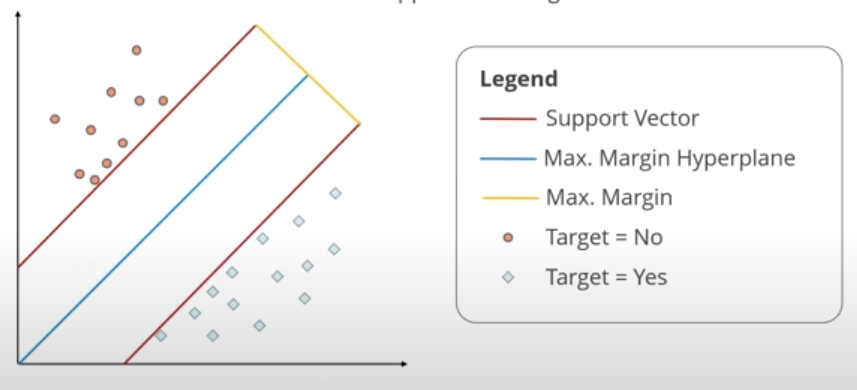

---
### **TIPOS DE SVM**

**1. Lineal**  

  Se usa cuando los datos pueden separarse mediante una **línea recta** (en 2D) o un **hiperplano** (en más dimensiones).  
    Ejemplo: si los puntos de dos clases pueden dividirse con una frontera recta, los datos son **linealmente separables**.

**2. No lineal**  
  Se aplica cuando los datos **no son linealmente separables**.  
    Aquí se utiliza un **kernel** (como el RBF o polinómico) para proyectar los datos a un espacio de mayor dimensión donde sí puedan separarse.





In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
df2 = pd.DataFrame(data.target, columns=['Cancer'])
df2.head()

df = pd.concat([df, df2], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [18]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='mean concavity', ylabel='worst area'>

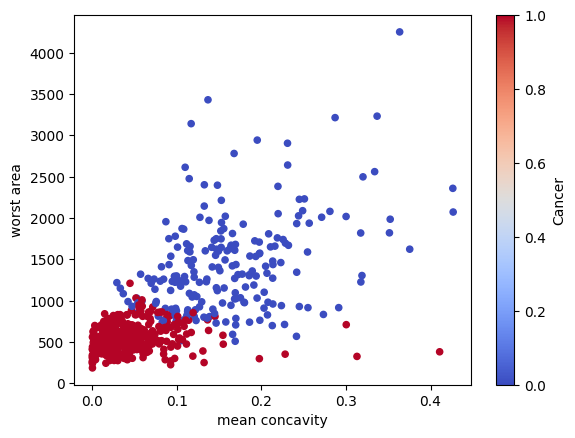

In [20]:
df.plot(kind='scatter', x='mean concavity', y='worst area', c='Cancer', cmap='coolwarm')


In [22]:
X = df.drop('Cancer', axis=1)
y = df['Cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [23]:
from sklearn.model_selection import GridSearchCV

modelo = svm.SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(modelo, param_grid, refit=True, verbose=1, cv= 5, n_jobs=-1)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [25]:
print(f' Los mejores parametros: {grid_search.best_params_}')
print(f'El mejor estimador: {grid_search.best_estimator_}')
print(f'La exactitud del modelo: {grid_search.best_score_}')


 Los mejores parametros: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
El mejor estimador: SVC(C=10, gamma=0.0001)
La exactitud del modelo: 0.9406593406593406


In [26]:
y_test_pred = grid_search.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(f'La metrix de confusion:{confusion_matrix(y_test, y_test_pred)}')
print(f'Las metricas: {classification_report(y_test, y_test_pred)}')

La metrix de confusion:[[36  6]
 [ 0 72]]
Las metricas:               precision    recall  f1-score   support

           0       1.00      0.86      0.92        42
           1       0.92      1.00      0.96        72

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



### 📊 Cohen’s Kappa

El **índice Kappa de Cohen** es una métrica que mide el **nivel de acuerdo** entre dos clasificadores o evaluadores, teniendo en cuenta que parte del acuerdo puede deberse **al azar**.

---

### 🔹 ¿Por qué usarlo?
- El **accuracy** solo mide el porcentaje de aciertos, pero puede ser engañoso cuando hay **clases desbalanceadas**.  
- El **Cohen’s Kappa** ajusta el acuerdo observado restando el efecto de la coincidencia por pura suerte.  

---

### 🔹 Fórmula

κ = (Po − Pe) / (1 − Pe)

- **Po** = proporción de acuerdo observado (qué tanto coinciden realmente).  
- **Pe** = proporción de acuerdo esperado por azar.  

---

### 🔹 Interpretación de valores

| Valor κ       | Interpretación del acuerdo |
|---------------|----------------------------|
| < 0           | Peor que el azar           |
| 0.0 – 0.20    | Acuerdo mínimo             |
| 0.21 – 0.40   | Acuerdo débil              |
| 0.41 – 0.60   | Acuerdo moderado           |
| 0.61 – 0.80   | Acuerdo sustancial         |
| 0.81 – 1.00   | Acuerdo casi perfecto      |

---


### 🔹 En Machine Learning

Sirve para evaluar modelos de clasificación, especialmente cuando:  
- El dataset está **desbalanceado**.  
- Queremos medir si el modelo **aprende realmente** o si clasifica bien solo **por casualidad**.  





In [30]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_test_pred)
print("Cohen's Kappa:", kappa)


Cohen's Kappa: 0.8834355828220859
